# How higher video games' sales affect critics' scores.

## An analysis of how games' sales affect critics' scores.

## ETL & DATA CLEANING

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='vgsales-12-4-2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [2]:
df_game = df_data_1[['Name', 'Critic_Score', 'User_Score', 'Global_Sales', 'Year', 'Genre']]

In [3]:
df_game.head(10)

,Name,Critic_Score,User_Score,Global_Sales,Year,Genre
0,Wii Sports,7.7,NaN,NaN,2006.0,Sports
1,Super Mario Bros.,10.0,NaN,NaN,1985.0,Platform
2,Mario Kart Wii,8.2,9.1,NaN,2008.0,Racing
3,PlayerUnknown's Battlegrounds,NaN,NaN,NaN,2017.0,Shooter
4,Wii Sports Resort,8.0,8.8,NaN,2009.0,Sports
5,Pokemon Red / Green / Blue Version,9.4,NaN,NaN,1998.0,Role-Playing
6,New Super Mario Bros.,9.1,8.1,NaN,2006.0,Platform
7,Tetris,NaN,NaN,NaN,1989.0,Puzzle
8,New Super Mario Bros. Wii,8.6,9.2,NaN,2009.0,Platform
9,Minecraft,10.0,NaN,NaN,2010.0,Misc


In [4]:
df_game = df_game.dropna()

In [5]:
df_game.reset_index(inplace = True)
df_game.drop("index", axis = 1, inplace = True)
df_game.shape

(142, 6)

In [6]:
df_game.head()

,Name,Critic_Score,User_Score,Global_Sales,Year,Genre
0,Call of Duty: Modern Warfare 2,9.5,9.0,13.53,2009.0,Shooter
1,Grand Theft Auto IV,10.0,9.0,10.57,2008.0,Action
2,Call of Duty 4: Modern Warfare,9.6,9.0,9.41,2007.0,Shooter
3,Grand Theft Auto V,9.0,9.0,8.72,2014.0,Action
4,Call of Duty: World at War,8.5,7.8,7.50,2008.0,Shooter


## EXPLORATORY ANALYSIS

In [7]:
## Importing Data Visualization packages
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

In [8]:
df_game_ = df_game.groupby("Genre").sum()
df_game_.head()

,Critic_Score,User_Score,Global_Sales,Year
Genre,,,,
Action,285.6,295.3,98.54,72322.0
Action-Adventure,22.9,21.9,1.48,6052.0
Adventure,115.5,115.8,13.60,28107.0
Fighting,53.9,59.3,8.87,14056.0
Misc,21.8,25.1,5.74,6033.0


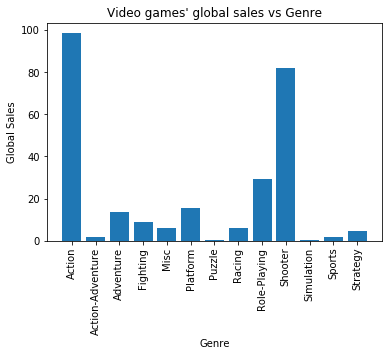

In [9]:
## A bar graph showing how global sales vary across genres
plt.bar(df_game_.index, "Global_Sales", data = df_game_)
plt.xlabel("Genre")
plt.ylabel("Global Sales")
plt.title("Video games' global sales vs Genre")
plt.xticks(rotation = 90)
plt.show()

In [10]:
df_game.corr()

,Critic_Score,User_Score,Global_Sales,Year
Critic_Score,1.000000,0.510951,0.503319,-0.165064
User_Score,0.510951,1.000000,0.200586,-0.089654
Global_Sales,0.503319,0.200586,1.000000,-0.049799
Year,-0.165064,-0.089654,-0.049799,1.000000


In [11]:
df_game1 = df_game.groupby("Year").sum()
df_game1.head()

,Critic_Score,User_Score,Global_Sales
Year,,,
1996.0,17.3,17.7,0.60
1997.0,9.3,9.0,1.27
1999.0,24.7,28.7,0.84
2000.0,7.8,6.5,1.86
2001.0,18.5,15.9,9.69


In [12]:
from sklearn import linear_model
line = linear_model.LinearRegression() 

In [13]:
df_critic = df_game.loc[:, "Critic_Score"].values.reshape(-1, 1) 
df_user = df_game.loc[:, "User_Score"].values.reshape(-1, 1) 
line.fit(df_critic,df_user) 
pred = line.predict(df_user)

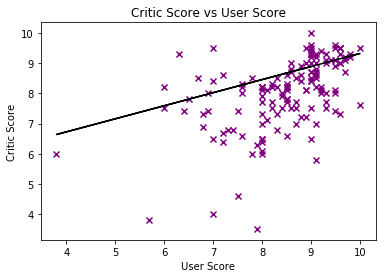

In [14]:
## A scatter plot of Critic Score vs User Score
plt.scatter('User_Score', 'Critic_Score', data = df_game, marker = 'x', color = 'purple')
plt.xlabel("User Score")
plt.ylabel("Critic Score")
plt.plot(df_user, pred, color='black')
plt.title("Critic Score vs User Score")
plt.show()

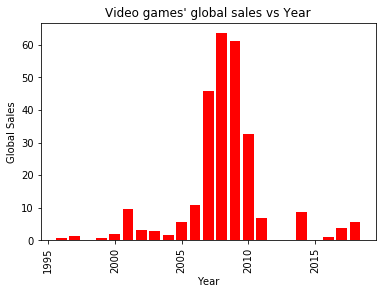

In [15]:
## A bar graph showing how global sales vary across the years
plt.bar(df_game1.index, "Global_Sales", data = df_game1, color = "red")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.title("Video games' global sales vs Year")
plt.xticks(rotation = 90)
plt.show()

In [16]:
import random 
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [17]:
from sklearn.preprocessing import StandardScaler
X = df_game[['Critic_Score', 'User_Score', 'Global_Sales']]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [18]:
## creating a k-means model
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1]


In [19]:
df_game["group"] = labels
df_game.head(30)

,Name,Critic_Score,User_Score,Global_Sales,Year,Genre,group
0,Call of Duty: Modern Warfare 2,9.5,9.0,13.53,2009.0,Shooter,2
1,Grand Theft Auto IV,10.0,9.0,10.57,2008.0,Action,2
2,Call of Duty 4: Modern Warfare,9.6,9.0,9.41,2007.0,Shooter,2
3,Grand Theft Auto V,9.0,9.0,8.72,2014.0,Action,2
4,Call of Duty: World at War,8.5,7.8,7.50,2008.0,Shooter,2
5,Uncharted 3: Drake's Deception,9.3,6.3,6.84,2011.0,Action,2
6,Uncharted 2: Among Thieves,9.5,9.6,6.74,2009.0,Action,2
7,Call of Duty 4: Modern Warfare,9.5,9.6,6.72,2007.0,Shooter,2
8,Red Dead Redemption,9.5,10.0,6.50,2010.0,Action,2
9,Metal Gear Solid 2: Sons of Liberty,9.5,7.0,6.05,2001.0,Action,2


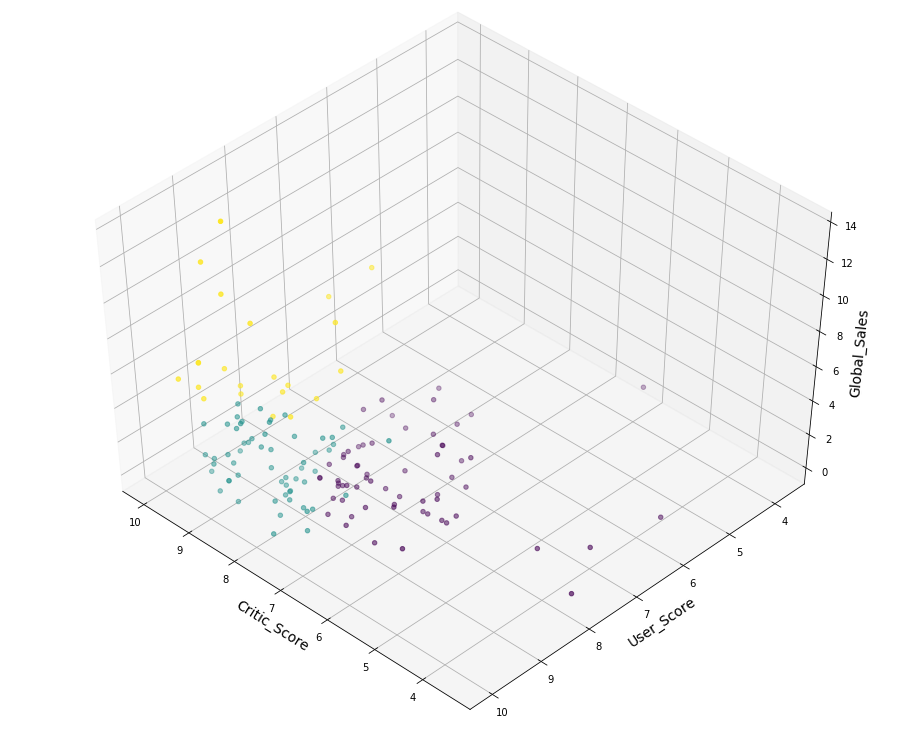

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(13,10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Critic_Score', fontsize = 14)
ax.set_ylabel('User_Score', fontsize = 14)
ax.set_zlabel('Global_Sales', fontsize = 14)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float))

In [21]:
df_games1 = df_game.groupby('group').mean()

In [22]:
df_games1['color'] = ['purple','green','yellow']

In [23]:
df_games1.head()

,Critic_Score,User_Score,Global_Sales,Year,color
group,,,,,
0,7.106452,7.737097,0.576613,2009.306452,purple
1,8.577586,9.086207,1.510345,2007.568966,green
2,9.072727,8.813636,6.541818,2008.636364,yellow
